# <span style= 'color: green'> **Where should I live?** </span> <br>
## Leveraging Data to Optimize Quality of Life Choices
### Group Project of Programming for Data Science 2025/26 <br>
Angelica Lamberti (20250999) <br>
Samuel Nazzaro (20251152) <br>
Efe Oksuzz (20251012) <br> 
Maddleine Rimmer <br>
Link to our repository on GitHub: https://github.com/angelicalamberti/PDS_groupproject.git

 <span style= 'color: red'>**Introduction** </span> <br> In the wake of increasing mobility across Europe, fueled by remote work, international education, and shifting social and economic priorities, there has been growing demand for tools that help citizens make better-informed decisions about where to live. <br>
 <span style= 'color: red'> **Objectives** </span> <br>
-Design a tool that translates complex country-level data into clear, actionable insights for everyday people: students seeking affordable education, professionals looking for better work-life balance, retirees interested in safety and healthcare, and more. <br>
-Simplify this decision-making process by analyzing key characteristics of European countries, such as cost of living, safety, and employment. Through exploratory analysis, visualizations, and interpretable insights, the goal is to build a framework that empowers users to evaluate which countries align best with their personal values and life goals.

In [1]:
#Install packages
#!pip install beautifulsoup4   
#!pip install selenium 
#!pip install requests
#!pip install geopandas
#!pip install geopy
#!pip install geodatasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import geopandas as gpd
import selenium
import requests
from bs4 import BeautifulSoup

# Print versions of all packages used in this notebook
print("PACKAGE VERSIONS USED IN THIS NOTEBOOK")
print("--------------------------------------")
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("plotly:", plotly.__version__)
print("geopandas:", gpd.__version__)
print("requests:", requests.__version__)
print("BeautifulSoup4:", BeautifulSoup.__module__.split('.')[0])

PACKAGE VERSIONS USED IN THIS NOTEBOOK
--------------------------------------
pandas: 2.3.2
numpy: 2.2.6
matplotlib: 3.10.7
seaborn: 0.13.2
plotly: 6.3.1
geopandas: 0.14.4
requests: 2.32.4
BeautifulSoup4: bs4


**Note:**  
This cell displays the exact version of each Python package used throughout the notebook.  
Showing package versions ensures reproducibility and avoids conflicts.

---

## <span style= 'color: blue'> 1.  Data wrangling and analysis </span> 
In this phase row data is transformed into clean, structured dataset. 

As a first step, our dataset (which is in a 'csv' format) is imported in Python.

In [3]:
data= pd.read_csv('city_data.csv', sep='|', header=1, parse_dates=['Last Data Update'])

num_rows, num_cols = data.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

data.head()

The dataset has 86 rows and 14 columns.


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17


### **Exploratory Analysis**
**Question 1** How did you handle missing values and duplicate records in the dataset? 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Avgerage Rent Price              86 non-null     int64         


Since the Average Price Groceries column contains more than 90% missing values, it provides limited analytical value. Therefore, this variable will be excluded from further analysis. To preserve the integrity of the original dataset, a copy—named data_copy—is created, and all the changes will be applied to this duplicate.

In [5]:
data_copy=data.drop('Average Price Groceries', axis=1)
data_copy = data_copy.rename(columns={"Avgerage Rent Price": "Average Rent Price"})
data_copy

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


What about duplicate records?

In [6]:
data_copy['City'].describe()

count                  86
unique                 84
top       Berlin. Germany
freq                    2
Name: City, dtype: object

In [7]:
data_copy['City'].value_counts()

City
Berlin. Germany           2
Malaga, Spain             2
Vienna, Austria           1
Rotterdam, Netherlands    1
The Hague, Netherlands    1
                         ..
Madrid, Spain             1
Odense, Denmark           1
Copenhagen, Denmark       1
Hanover, Germany          1
Adana, Turkiye            1
Name: count, Length: 84, dtype: int64

The entries ‘Berlin, Germany’ and ‘Malaga, Spain’ appear twice in the dataset, indicating the potential presence of duplicate records. The next step is to verify whether these entries contain the same information. For this purpose, we will apply text-mining techniques to clean the dataset and have a more efficient access to its content. <br>
In particular, since the ‘City’ column contains two distinct pieces of information—city and country—we aim to split it into two separate columns: one representing the city and the other the country.

In [8]:
citycountry_list=data_copy['City'].unique()
print (citycountry_list)

['Vienna, Austria' 'Salzburg, Austria' 'Brussels, Belgium'
 'Antwerp, Belgium' 'Gent, Belgium' 'Bruges, Belgium' 'Sofia, Bulgaria'
 'Dobrich, Bulgaria' 'Zurich, Switzerland' 'Geneva, Switzerland'
 'Basel, Switzerland' 'Lefkosia, Cyprus' 'Lemesos;Cyprus'
 'Prague, Czechia' 'Ostrava, Czechia' 'Berlin. Germany' 'Hamburg, Germany'
 'Munich, Germany' 'Cologne, Germany' 'Frankfurt am Main, Germany'
 'Stuttgart, Germany' 'Leipzig, Germany' 'Dresden, Germany'
 'Dusseldorf, Germany' 'Hanover, Germany' 'Copenhagen, Denmark'
 'Odense, Denmark' 'Madrid, Spain' 'Barcelona, Spain' 'Valencia, Spain'
 'Seville, Spain' 'Malaga, Spain' 'Tallinn, Estonia' 'Helsinki, Finland'
 'Tampere, Finland' 'Paris, France' 'Lyon,  France' 'Toulouse, France'
 'London, United Kingdom' 'Leeds, United Kingdom'
 'Glasgow, United Kingdom' 'Liverpool, United Kingdom'
 'Edinburgh, United Kingdom' 'Greece, Athens' 'Thessaloniki, Greece'
 'Zagreb, Croatia' 'Split, Croatia' 'Budapest, Hungary' 'Miskolc, Hungary'
 'Debrecen, Hun

In [9]:
data_copy = data_copy.rename(columns={'City': 'city&country'}) 

In [10]:
data_copy['city&country'] = data_copy['city&country'].str.replace('[;.]', ',', regex=True)\
    .str.replace(r'\s+', ' ', regex=True)\
    .str.strip()\
    .str.replace('Greece, Athens', 'Athens, Greece')

In [11]:
#Now we can delete duplicate rows
data_copy = data_copy.drop_duplicates(subset='city&country', keep='first')
data_copy = data_copy.reset_index(drop=True)
data_copy

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


In [12]:
data_copy['City']=data_copy['city&country'].str.split(',', n=1, expand=True)[0] 
data_copy['Country']=data_copy['city&country'].str.split(',', n=1, expand=True)[1] 

data_copy['City'] = data_copy['City'].str.strip()
data_copy['Country'] = data_copy['Country'].str.strip()

data_copy

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,City,Country
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,Vienna,Austria
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,Salzburg,Austria
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,Brussels,Belgium
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,Antwerp,Belgium
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,Gent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11,Stockholm,Sweden
80,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,Gothenburg,Sweden
81,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07,Malmo,Sweden
82,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08,Ankara,Turkiye


**Question 2.a** Which country appears most frequently in the dataset? How many cities are associated with it?

In [13]:
countries_count = data_copy['Country'].value_counts()
print(countries_count)
top_country = countries_count.idxmax()
top_count = countries_count.max()

print(f"The country with the highest number of entries is {top_country} with {top_count} occurrences.")

Country
Germany            10
Italy               6
Spain               5
Netherlands         5
United Kingdom      5
Belgium             4
Portugal            4
Hungary             3
Sweden              3
Switzerland         3
Poland              3
Norway              3
France              3
Ireland             2
Austria             2
Croatia             2
Greece              2
Finland             2
Denmark             2
Czechia             2
Cyprus              2
Bulgaria            2
Turkiye             2
Luxembourg          1
Latvia              1
Malta               1
Estonia             1
Romania             1
Slovak Republic     1
Slovenia            1
Name: count, dtype: int64
The country with the highest number of entries is Germany with 10 occurrences.


In [14]:
german_cities = data_copy.loc[data_copy['Country'] == 'Germany', 'City'].unique()

print("Cities associated with Germany:")
for city in german_cities:
    print("-", city)

Cities associated with Germany:
- Berlin
- Hamburg
- Munich
- Cologne
- Frankfurt am Main
- Stuttgart
- Leipzig
- Dresden
- Dusseldorf
- Hanover


**Question 2.b** How many cities are present in total? How many are associated with Greece? 

In [15]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   city&country                     84 non-null     object        
 1   Population Density               83 non-null     float64       
 2   Population                       84 non-null     int64         
 3   Working Age Population           83 non-null     float64       
 4   Youth Dependency Ratio           84 non-null     float64       
 5   Unemployment Rate                83 non-null     float64       
 6   GDP per Capita                   83 non-null     float64       
 7   Days of very strong heat stress  84 non-null     int64         
 8   Main Spoken Languages            83 non-null     object        
 9   Average Monthly Salary           84 non-null     int64         
 10  Average Rent Price               84 non-null     int64         


In [16]:
columns=data_copy.columns.to_list()
data_copy = data_copy[columns[-2:] + columns[:-2]]
data_copy=data_copy.drop('city&country', axis=1)
#Putting the city and country columns as the first and second ones: it's better for visualization.

In [17]:
cities_sum = data_copy['City'].value_counts().sum()

cities_count=data_copy['Country'].value_counts()
print(cities_count)

greece_unique_cities = data_copy.loc[data_copy['Country'] == 'Greece', 'City'].nunique()
print('In total there are', cities_sum, 'cities.')
print("Number of cities associated with Greece:", greece_unique_cities)

Country
Germany            10
Italy               6
Spain               5
Netherlands         5
United Kingdom      5
Belgium             4
Portugal            4
Hungary             3
Sweden              3
Switzerland         3
Poland              3
Norway              3
France              3
Ireland             2
Austria             2
Croatia             2
Greece              2
Finland             2
Denmark             2
Czechia             2
Cyprus              2
Bulgaria            2
Turkiye             2
Luxembourg          1
Latvia              1
Malta               1
Estonia             1
Romania             1
Slovak Republic     1
Slovenia            1
Name: count, dtype: int64
In total there are 84 cities.
Number of cities associated with Greece: 2


**Question 2.c** Which is the least spoken language in the dataset? Which are the top 3 most spoken languages? 

In [18]:
#Cleaning the 'Main Spoken Language Column'

data_copy['Languages'] = data_copy['Main Spoken Languages'].str.split(',')
lan = data_copy['Languages'].explode().dropna()
lan = lan.str.strip()
count = lan.value_counts()
    
most_spoken_3=lan.value_counts().head(3)
least_spoken=lan.value_counts().idxmin()
print("Most spoken top 3", most_spoken_3)
print("Least spoken language is", least_spoken)

Most spoken top 3 Languages
English    46
German     14
Turkish    10
Name: count, dtype: int64
Least spoken language is Latvian


At third place, with 10 occurrencies we have both Turkish and French. The least spoken languages are Latvian, Maltese, Serbian, Romanian, Slovak, ScotsGaelic, Luxemboutgish, Scots, Bengali, Estonian, Valencian, Catalan and Slovene. Each of these languages occurs only once.

**Question 3.a** Entries uploaded before April 2023 need to be updated. Which cities would require an update? 

In [19]:
begin_April_23=pd.to_datetime('2023-04-1')
filter=data_copy[data_copy['Last Data Update']< begin_April_23]
filter['City']

10                Basel
17               Munich
19    Frankfurt am Main
36                 Lyon
57               Venice
80           Gothenburg
Name: City, dtype: object

The cities Basel, Munich, Frankfurt am Main, Lyon, Venice, and Gothenburg require an update, as their most recent data revisions date back to before April 2023.

**Question 3.b** How many days ago was the last update? On what day, month, and year did it occur? 

In [20]:
date_today= pd.Timestamp('today').normalize()
last_update=max(data_copy['Last Data Update'])
days= (date_today-last_update).days
print('The last update was', days, 'days ago')
print('The last update was on', last_update)

The last update was 370 days ago
The last update was on 2024-12-12 00:00:00


**Question 4.a** How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.

In [21]:
unemployment_rate=data_copy['Unemployment Rate']
GDP_per_capita=data_copy['GDP per Capita']

#We can drop the missing values from these columns
unempl_GDP = data_copy.loc[:, ('Unemployment Rate', 'GDP per Capita')].dropna(subset=["Unemployment Rate", "GDP per Capita"])
unempl_GDP

,Unemployment Rate,GDP per Capita
0,10.2,55770.0
1,3.0,66689.0
2,10.7,62500.0
3,6.2,57595.0
5,5.6,63083.0
...,...,...
79,6.2,70950.0
80,6.3,49588.0
81,9.2,44387.0
82,14.4,38916.0


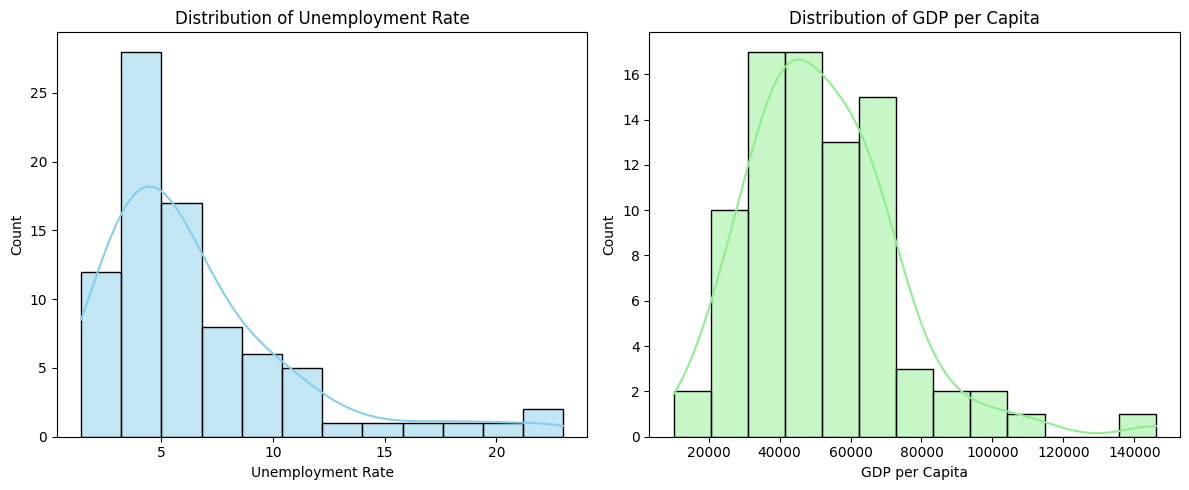

In [22]:
#How are Unemployement Rate and GDP per Capita distributed?
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(unemployment_rate, kde=True, color='skyblue')
plt.title('Distribution of Unemployment Rate')

plt.subplot(1,2,2)
sns.histplot(GDP_per_capita, kde=True, color='lightgreen')
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()

*Unemployment Rate*: <br>
The distribution is right-skewed, with most countries showing low to moderate unemployment (around 3–8%). A few countries with very high unemployment create a long right tail.
<br>
*GDP per Capita*: <br>
This distribution is also right-skewed. Most countries fall between 30,000€ and 70,000€, while a small number with very high GDP per capita extend the upper tail, indicating inequality in economic levels.

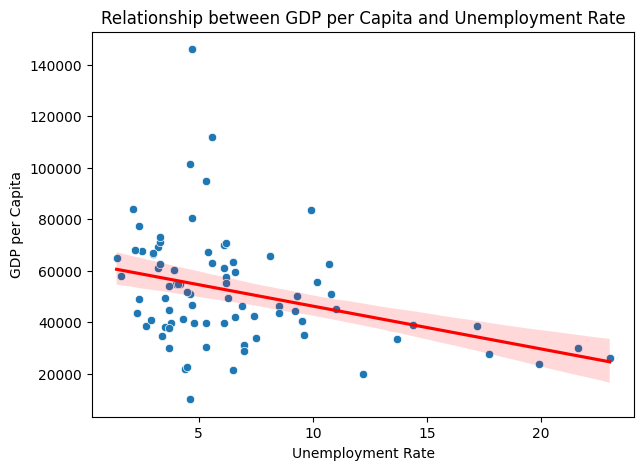

In [23]:
#Relationship between GDP per Capita and Unemployment Rate
plt.figure(figsize=(7,5))
sns.scatterplot(data=unempl_GDP, x= 'Unemployment Rate', y= 'GDP per Capita')
sns.regplot(data=unempl_GDP, x= 'Unemployment Rate', y= 'GDP per Capita', scatter=False, color='red')
plt.title('Relationship between GDP per Capita and Unemployment Rate')
plt.show()

The scatter plot illustrates the relationship between GDP per Capita and the Unemployment Rate.
The trend line shows a negative correlation between the two variables: as the unemployment rate increases, GDP per capita tends to decrease. This suggests that cities with higher unemployment rates generally exhibit lower levels of economic productivity per person.
However, the dispersion of data points indicates a certain degree of variability: some locations deviate from the general trend, showing relatively high GDP per capita even with moderate unemployment rates. The shaded region around the regression line suggest that while the overall relationship is negative, it is not perfectly linear.
Let's calclulate the Pearson correlation coefficient (we expect it to be negative).

In [24]:
corr = data_copy['GDP per Capita'].corr(data_copy['Unemployment Rate'])
print(f"Correlation: {corr:.2f}")

Correlation: -0.34


**Question 4.b** Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations. 

In [25]:
#top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living
data_copy['diff']=data_copy['Average Monthly Salary']-data_copy['Average Cost of Living']
top5 = data_copy.sort_values(by='diff', ascending=False).head(5)
top5

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages,diff
10,Basel,Switzerland,793.0,550152,358020.0,21.5,5.3,94826.0,5,"German, English, French",6366,2500,4239,2023-01-19,"[German, English, French]",2127
34,Tampere,Finland,65.0,444370,283876.0,25.6,6.6,41954.0,0,Finnish,3500,850,1600,2024-04-29,[Finnish],1900
33,Helsinki,Finland,322.0,1507140,1004835.0,25.1,6.6,59502.0,0,"Finnish, Swedish, English",3900,1050,2050,2023-09-12,"[Finnish, Swedish, English]",1850
8,Zurich,Switzerland,1058.0,1384728,939270.0,22.3,4.7,80431.0,4,"German, English",6636,3190,4862,2023-05-06,"[German, English]",1774
9,Geneva,Switzerland,1112.0,597269,404313.0,23.8,9.9,83747.0,1,"French, English",5794,2818,4263,2024-09-28,"[French, English]",1531


The top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living are:
1. Basel
2. Tampere
3. Helsinki
4. Zurich
5. Geneva 

In [26]:
# top 5 countries with the smallest average difference
avg_diff = data_copy.groupby('Country')['diff'].mean()

top5_smallest = avg_diff.sort_values().head(5)

print("Top 5 countries with the smallest average difference between Average Monthly Salary and Average Cost of Living:")
for country, diff_value in top5_smallest.items():
    print(f"- {country}: average difference = {diff_value}")

Top 5 countries with the smallest average difference between Average Monthly Salary and Average Cost of Living:
- Portugal: average difference = -207.5
- Greece: average difference = -125.0
- Slovak Republic: average difference = -50.0
- Turkiye: average difference = -25.0
- Poland: average difference = -16.666666666666668


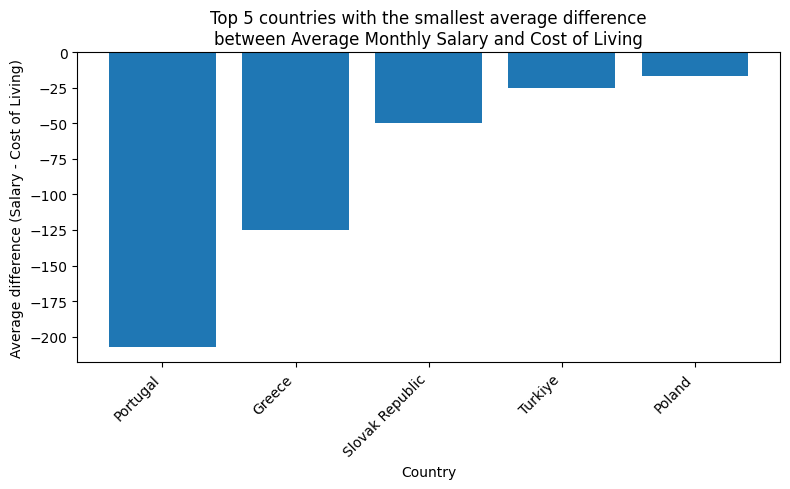

In [27]:
#Visualization 
plt.figure(figsize=(8, 5))

plt.bar(top5_smallest.index, top5_smallest.values)
plt.title("Top 5 countries with the smallest average difference\nbetween Average Monthly Salary and Cost of Living")
plt.xlabel("Country")
plt.ylabel("Average difference (Salary - Cost of Living)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

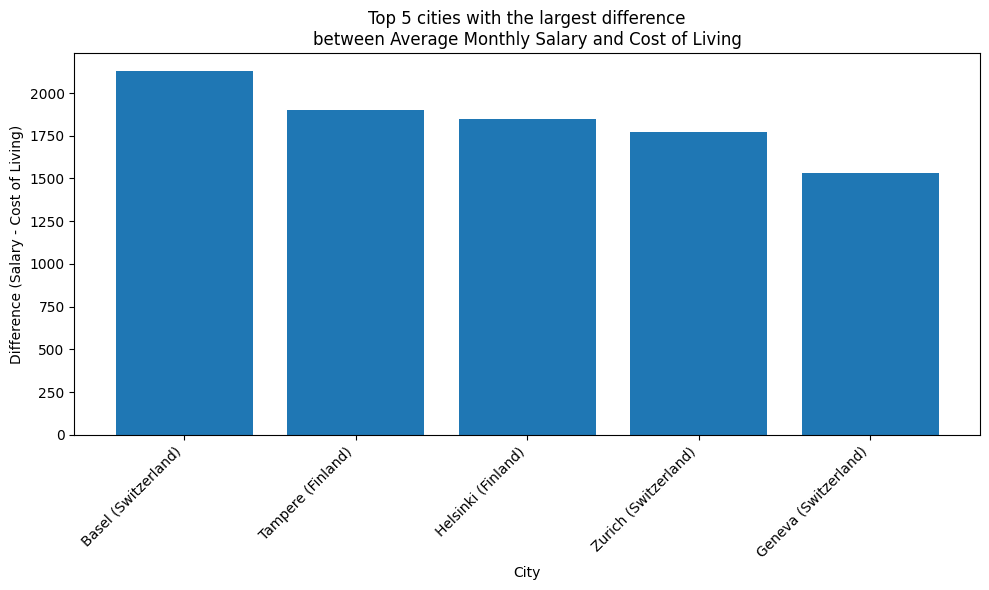

In [28]:
#Visualization
plt.figure(figsize=(10, 6))

city_labels = top5['City'] + " (" + top5['Country'] + ")"

plt.bar(city_labels, top5['diff'])
plt.title("Top 5 cities with the largest difference\nbetween Average Monthly Salary and Cost of Living")
plt.xlabel("City")
plt.ylabel("Difference (Salary - Cost of Living)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Question 4.c** Which is the best city for someone seeking: <br>
-An average monthly salary above €1600; <br>
-A cost of living below or equal to €900 <br>
-A country suitable for starting a family (with a relatively larger youth population)?

In [29]:
data_copy=data_copy.drop(columns=['diff'])

In [30]:
# Conditions required
cond_salary = data_copy['Average Monthly Salary'] > 1600
cond_cost   = data_copy['Average Cost of Living'] <= 900

filtered_data = data_copy[cond_salary & cond_cost]
filtered_data

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages


**No city in the dataset satisfies the first two conditions simultaneously**.  
This means that, within the available data, *no European city combines a salary above €1600 with such a low cost of living*.  
This is an informative result in itself.

### Best Alternative City

Since the strict criteria yielded no cities, we looked for the closest realistic option by:
1. Selecting all cities with a monthly salary above €1600.
2. Ranking them by lowest cost of living.
3. Choosing those with a Youth Dependency Ratio above the overall dataset average (indicating a more family-oriented environment).

From this filtered subset, the top candidate(s) represent the **best possible match** to the user’s requirements, even though no city meets all constraints perfectly.  

In [31]:
# Cities with salary above 1600
high_salary = data_copy[data_copy['Average Monthly Salary'] > 1600].copy()

# Sort by cost of living ascending (cheapest first)
high_salary_sorted = high_salary.sort_values('Average Cost of Living')
# Compute the mean youth dependency ratio to identify "family-friendly" countries
youth_mean = data_copy['Youth Dependency Ratio'].mean()

# Among the top cheapest cities, select those above average youth dependency ratio
best_candidates = high_salary_sorted[
    high_salary_sorted['Youth Dependency Ratio'] > youth_mean
]

# Show the top 5 best alternatives
best_candidates[['City','Country',
                 'Average Monthly Salary',
                 'Average Cost of Living',
                 'Youth Dependency Ratio']].head()


,City,Country,Average Monthly Salary,Average Cost of Living,Youth Dependency Ratio
30,Seville,Spain,2300,1150,25.0
4,Gent,Belgium,2400,1200,24.8
13,Prague,Czechia,1860,1590,26.2
32,Tallinn,Estonia,1700,1600,26.9
34,Tampere,Finland,3500,1600,25.6


**Question 5** What are three additional insights you find meaningful when comparing the given cities?

### Insight 1: Youth Dependency Ratio vs Working Age Population
Cities with a high Youth Dependency Ratio have a larger share of young people relative to the working-age population. <br> 
Cities with a larger Working Age Population have a stronger active labor force. <br>
This analysis helps identify which cities are more likely to face better future labor challenges.

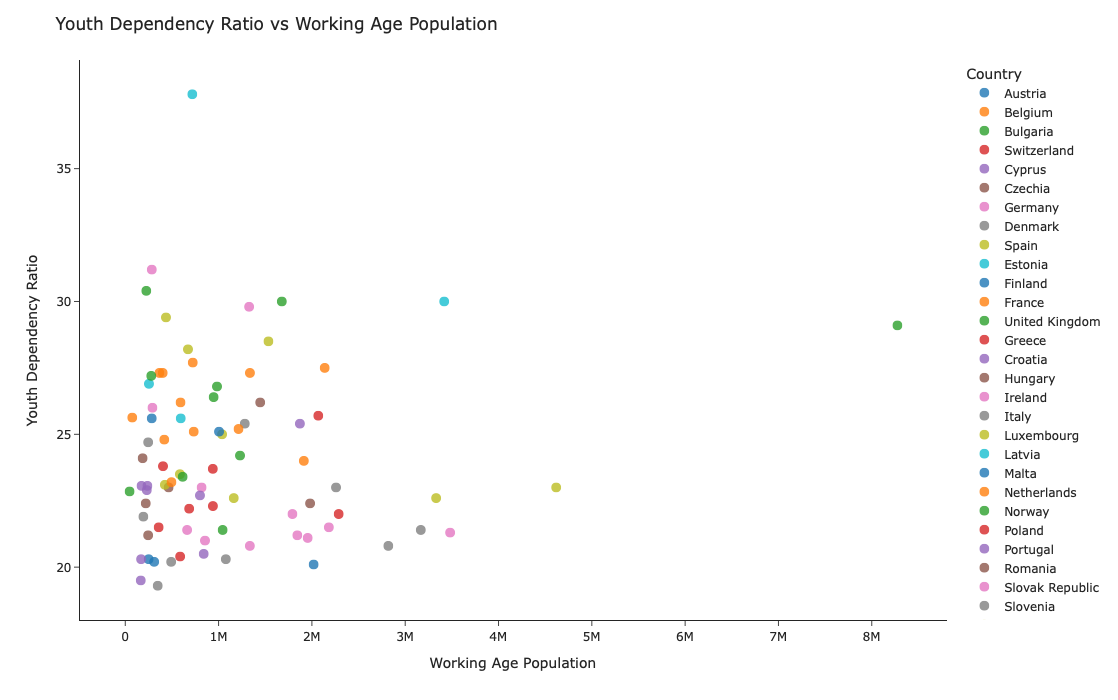

In [32]:
fig = px.scatter(
    data_copy,
    x="Working Age Population ",
    y="Youth Dependency Ratio",
    color="Country",             
    hover_name="City",           
    hover_data={
        "Country": True,
        "Working Age Population ": ":,",   
        "Youth Dependency Ratio": True
    },
    size_max=8,
    template="simple_white"
)

fig.update_traces(marker=dict(size=10, opacity=0.8))

fig.update_layout(
    title="Youth Dependency Ratio vs Working Age Population",
    xaxis_title="Working Age Population",
    yaxis_title="Youth Dependency Ratio",
    width=900,
    height=700,
    legend_title="Country"
)

fig.show()


The scatter plot shows how cities differ in their demographic structure by comparing Working Age Population and Youth Dependency Ratio. <br>
1. Large metropolitan cities
Cities like London, Madrid, Barcelona, Berlin, Rome have very large working-age populations and moderate youth dependency. <br>
2. Smaller cities with high youth dependency
Cities such as Adana, Ankara, Cork, Stavanger have high youth dependency ratios and smaller working-age populations. These cities have younger populations and may face more pressure on education services. <br>
3. Most European cities cluster in a balanced zone, showing a mid-range working-age populations and youth dependency around 22–27%. This may indicate that they have balanced demographic profiles.

In [33]:
print(data_copy.columns)

Index(['City', 'Country', 'Population Density', 'Population',
       'Working Age Population ', 'Youth Dependency Ratio',
       'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Average Rent Price',
       'Average Cost of Living', 'Last Data Update', 'Languages'],
      dtype='object')


### Insight 2: Unemployment vs Salary
Comparing unemployment rate and average salary across cities helps reveal economic strength: cities with high salaries and low unemployment tend to have, strong labor markets and high productivity; meanwhile cities with high unemployment and low salaries may indicate weaker job markets.

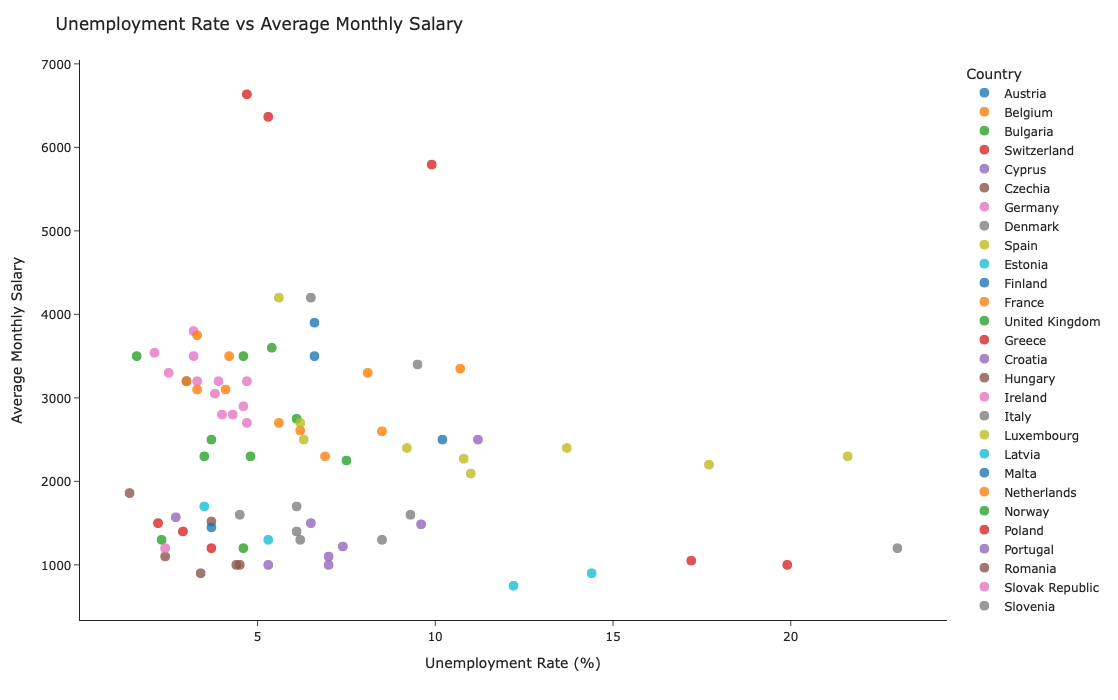

In [34]:
fig = px.scatter(
    data_copy,
    x="Unemployment Rate",
    y="Average Monthly Salary",
    color="Country",           
    hover_name="City",         
    hover_data={
        "Unemployment Rate": True,
        "Average Monthly Salary": ":,",  # format numerico
        "Country": True
    },
    template="simple_white"
)

fig.update_traces(marker=dict(size=10, opacity=0.8))

fig.update_layout(
    title="Unemployment Rate vs Average Monthly Salary",
    xaxis_title="Unemployment Rate (%)",
    yaxis_title="Average Monthly Salary",
    width=900,
    height=700,
    legend_title="Country"
)

fig.show()


The scatter plot shows that cities like Zurich, Basel, and Geneva have very high salaries and low unemployment, indicating strong and productive labor markets. Many Northern and Western European cities (Amsterdam, Copenhagen, Helsinki, Munich) group together with moderate unemployment and middle-high salaries. In contrast, several Southern and Eastern European cities—such as Naples, Thessaloniki, Athens, Adana, and Ankara—show high unemployment and significantly lower salaries, highlighting weaker labor market performance. Cities like Valencia, Madrid, Barcelona fall in the middle, with moderate salaries but elevated unemployment.

### Insight 3: heat-stress
The number of days with very strong heat stress is an important factor for assessing quality of life and health risks, especially for children, the elderly and people with medical conditions. 
In addition to this, frequent heat-stress days can increase energy costs (e.g., air conditioning) and affect productivity. From a long-term perspective, this indicator also signals climate resilience: cities with fewer extreme-heat days may offer a more stable, comfortable environment. Overall heat stress is an important factor to think about when evaluating long-term livability.

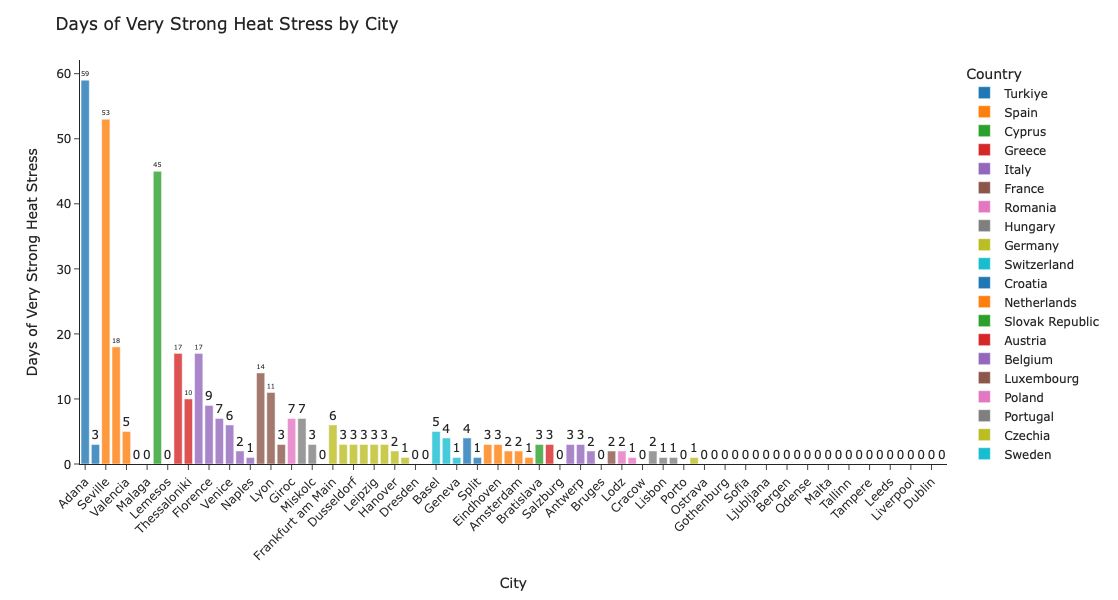

In [35]:
# Sorting values in ascending order
df_sorted = data_copy.sort_values("Days of very strong heat stress", ascending=False)

fig = px.bar(
    df_sorted,
    x="City",
    y="Days of very strong heat stress",
    text="Days of very strong heat stress",  
    color="Country",                          
    template="simple_white"
)

fig.update_layout(
    title="Days of Very Strong Heat Stress by City",
    xaxis_title="City",
    yaxis_title="Days of Very Strong Heat Stress",
    width=1400,
    height=600,
    xaxis_tickangle=-45,       
    legend_title="Country"
)

fig.update_traces(
    textposition="outside",    
    marker=dict(opacity=0.8)
)

fig.show()


The chart shows that southern cities like Adana, Seville, Lefkosia, and Athens experience very high numbers of extreme heat-stress days, suggesting significant climate pressure and low comfort during summer. As expected, many Northern cities—such as Edinburgh, Dublin, Copenhagen, Helsinki, and Stockholm have almost no heat-stress days, indicating much cooler and more stable conditions.

In [36]:
#The clean dataset is exported
data_copy.to_excel("data_copy.xlsx")

---

## <span style= 'color: blue'> 2. Interactive Map </span> 
The goal of this section is to create an interactive map of Europe where users can explore cities and view relevant information such as country, population, average salary, and cost of living.

### Web scraping

**Source of Geographical Coordinates** <br>
All geographical coordinates used in this project were obtained **exclusively through web scraping from Wikipedia**, as required by the project instructions.

Each city's dedicated Wikipedia page was accessed and parsed automatically to retrieve its latitude and longitude.  
No external datasets or alternative sources were used, except for *Madrid*, whose coordinates were extracted manually due to missing coordinate data on its Wikipedia page. Conceptually, this value can be treated as a missing observation, and therefore it would have also been acceptable to drop this entry from the dataset.

In some cases (e.g., Split and Cork), the original city names had to be adjusted (such as “Split, Croatia” and “Cork (city)”) to correctly match the corresponding Wikipedia page. <br>


In [37]:
cities=data_copy['City'].str.replace('Gent', 'Ghent').str.replace('Split','Split, Croatia').str.replace ('Cork', 'Cork (city)').to_list()

In [39]:
#This cell may take some seconds to run because it scrapes Wikipedia pages

from urllib.parse import quote

def get_coords(city):

    url = f"https://en.wikipedia.org/wiki/{quote(city.replace(' ', '_'))}"
    
    headers = {"User-Agent": "Mozilla/5.0"} 
    r = requests.get(url, headers=headers)
    
    if r.status_code != 200:
        return None, None
    
    soup = BeautifulSoup(r.text, "html.parser")
    
    lat_tag = soup.find("span", class_="latitude")
    lon_tag = soup.find("span", class_="longitude")
    
    if lat_tag and lon_tag:
        return lat_tag.text, lon_tag.text
    else:
        return None, None
    


latitude = []
longitude = []

for city in cities:
    lat, lon = get_coords(city)
    latitude.append(lat)
    longitude.append(lon)
    print(f"{city}  {lat}, {lon}")

data_copy["latitude"] = latitude
data_copy["longitude"] = longitude



Vienna  48°12′30″N, 16°22′21″E
Salzburg  47°48′00″N, 13°02′42″E
Brussels  50°50′48″N, 04°21′09″E
Antwerp  51°13′04″N, 04°24′01″E
Ghent  51°03′13″N, 03°43′31″E
Bruges  51°12′32″N, 03°13′27″E
Sofia  42°42′N, 23°20′E
Dobrich  43°34′N, 27°50′E
Zurich  47°22′28″N, 08°32′28″E
Geneva  46°12′06″N, 06°08′49″E
Basel  47°33′17″N, 07°35′26″E
Lefkosia  35°10′21″N, 33°21′54″E
Lemesos  34°40′29″N, 33°02′39″E
Prague  50°5′15″N, 14°25′17″E
Ostrava  49°50′8″N, 18°17′33″E
Berlin  52°31′12″N, 13°24′18″E
Hamburg  53°33′N, 10°00′E
Munich  48°08′15″N, 11°34′30″E
Cologne  50°56′11″N, 6°57′10″E
Frankfurt am Main  50°06′38″N, 08°40′56″E
Stuttgart  48°46′39″N, 09°10′48″E
Leipzig  51°20′24″N, 12°22′30″E
Dresden  51°03′00″N, 13°44′24″E
Dusseldorf  51°13′32″N, 6°46′36″E
Hanover  52°22′N, 9°43′E
Copenhagen  55°40′34″N, 12°34′06″E
Odense  55°23′45″N, 10°23′19″E
Madrid  40°30′N, 3°40′W
Barcelona  41°23′N, 2°11′E
Valencia  39°28′12″N, 00°22′35″W
Seville  37°23′24″N, 5°59′24″W
Malaga  36°43′10″N, 4°25′12″W
Tallinn  59°2

In [40]:
data_copy.head()

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages,latitude,longitude
0,Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,"[German, English, Turkish, Serbian]",48°12′30″N,16°22′21″E
1,Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,[German],47°48′00″N,13°02′42″E
2,Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,"[French, Dutch, Arabic, English]",50°50′48″N,04°21′09″E
3,Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,"[Dutch, French, Arabic]",51°13′04″N,04°24′01″E
4,Gent,Belgium,552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,"[Dutch, French]",51°03′13″N,03°43′31″E


In [41]:
# Coordinates of Madrid
madrid_lat = "40°25′10″N"
madrid_lon = "3°42′14″W"
# Set coordinates for all rows where city == "Madrid"
mask = data_copy["City"] == "Madrid"
data_copy.loc[mask, "latitude"] = madrid_lat
data_copy.loc[mask, "longitude"] = madrid_lon

In [42]:
#double check 
data_copy[data_copy['City']=='Madrid']

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update,Languages,latitude,longitude
27,Madrid,Spain,873.0,6882461,4617753.0,23.0,10.8,51020.0,18,Spanish,2271,1100,1589,2023-05-14,[Spanish],40°25′10″N,3°42′14″W


### Interactive Map

In this step we build an interactive map of European cities using the geographic coordinates previously scraped.
With geopandas we load a polygon map of Europe and convert our data_copy table of cities into a GeoDataFrame of points.
Each city is displayed as a marker on the map; when the user hovers on a marker, a popup shows: <br>
-The country <br>
-The population <br>
-The average monthly salary <br>
-The average cost of living <br>

*Check*: are there missing values in the columns that contain the information we want to include in the map?

In [43]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             84 non-null     object        
 1   Country                          84 non-null     object        
 2   Population Density               83 non-null     float64       
 3   Population                       84 non-null     int64         
 4   Working Age Population           83 non-null     float64       
 5   Youth Dependency Ratio           84 non-null     float64       
 6   Unemployment Rate                83 non-null     float64       
 7   GDP per Capita                   83 non-null     float64       
 8   Days of very strong heat stress  84 non-null     int64         
 9   Main Spoken Languages            83 non-null     object        
 10  Average Monthly Salary           84 non-null     int64         


**Step 1** A function is created to transform coordinates from DMS string to decimal degrees. This is a necessary step to build the Europe map using Geopandas.

In [44]:
# DMS string → decimal degrees

def dms_to_decimal(value):
    s = str(value).strip()

    # Handle empty / None / 'nan'
    if s.lower() in ("none", "", "nan"):
        return np.nan

    # If there are no DMS symbols and no N/S/E/W, try direct float
    if not any(ch in s.upper() for ch in ["N", "S", "E", "W", "°", "′", "”", "″"]):
        try:
            return float(s)
        except ValueError:
            return np.nan

    # South and West are negative
    sign = -1 if ("S" in s.upper() or "W" in s.upper()) else 1

    # Extract numeric parts: degrees, minutes, seconds
    nums = re.findall(r"\d+", s)
    if len(nums) == 0:
        return np.nan

    degrees = float(nums[0])
    minutes = float(nums[1]) if len(nums) > 1 else 0.0
    seconds = float(nums[2]) if len(nums) > 2 else 0.0

    decimal = degrees + minutes / 60 + seconds / 3600
    return sign * decimal

# Create decimal latitude/longitude for mapping

data_copy["lat_dd"] = data_copy["latitude"].apply(dms_to_decimal)
data_copy["lon_dd"] = data_copy["longitude"].apply(dms_to_decimal)

# Remove rows with invalid coordinates
data_copy = data_copy.dropna(subset=["lat_dd", "lon_dd"]).reset_index(drop=True)

NameError: name 're' is not defined

**Step 2** Creating a GeoDataFrame from data_copy.

In [ ]:
#df cointains only the information we need to show on the map

df = data_copy.drop(columns=['City','Population Density', 'Working Age Population ', 'Youth Dependency Ratio',
                    'Unemployment Rate', 'GDP per Capita', 'Days of very strong heat stress',
                    'Main Spoken Languages', 'Average Rent Price', 'Last Data Update', 
                             'Languages', 'latitude', 'longitude'])

cities_gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df["lon_dd"], df["lat_dd"]),
    crs="EPSG:4326"    # geographic coordinates (lat/lon)
)

**Step 3** Building the map using GeoPandas.

In [ ]:
# Load the world map from the built-in Natural Earth dataset and select Europe

import geopandas as gpd
import geodatasets

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
europe = world[world["continent"] == "Europe"].copy()

# Changing the coordinate system for nicer visualization

cities_gdf = cities_gdf.to_crs(epsg=3857)
europe = europe.to_crs(epsg=3857)

# Europe background 

base = europe.explore(
    tiles="CartoDB positron", #clean style
    style_kwds={
        "fill": False,        # do not fill polygons 
        "fillOpacity": 0,     # ensure no fill color is applied
        "color": None,        # no border color
        "weight": 0           # no border line
    },
    tooltip=False,
    popup=False,
    zoom_start=4,              
    location=[54, 15]          #approximately the centre of Europe
)

# City points on top of the existing map

m = cities_gdf.explore(
    m=base,               # add to the existing map 'm'
    color="red", # marker color for the cities
    tooltip=list(df.drop(columns=['lat_dd','lon_dd']).columns),   # ONLY columns from df will appear
    popup=list(df.drop(columns=['lat_dd','lon_dd']).columns),     # same for popup
    marker_kwds={"radius": 6}
)

m  


---

## <span style='color: blue'> 3. Data Science in Action </span>

This section turns the cleaned dataset into a **decision-support tool**: a reusable City Comparison Tool that helps users compare European cities across income, affordability, labour market conditions, and climate stress.

**What you will find in this section**
- A reusable comparison pipeline (table + plots + short insights).
- Two realistic use cases showing how the tool supports decisions.
- A short conclusion on what the tool shows and what it does *not* cover.


A **City Comparison Tool** is designed to support people deciding where to live by enabling a direct, structured comparison between multiple European cities.

Instead of reading raw indicators one by one, the tool:
- puts the key metrics side by side (same structure for every city),
- computes a simple derived indicator (Net Monthly Margin = Salary − Cost of Living),
- and provides plots + quick insights to make trade-offs easier to interpret.


#### City Comparison Tool – Description

**Inputs**
- A list of **2+ city names** (e.g., `["Vienna", "Brussels", "Zurich"]`).
- The reference dataset `comparison_df` (built from the cleaned `data_copy`).

**Core indicators shown**
- Salary and cost indices: *Average Monthly Salary*, *Average Cost of Living*.
- Work conditions: *Unemployment rate*.

**Derived metric**
- **Net Monthly Margin** = Salary − Cost of Living  
  This is used as a *simple proxy* for potential monthly purchasing power.

**Outputs**
- A comparison table.
- Two charts:
  1) Salary vs Cost of Living  
  2) Net Monthly Margin
- A small set of automatically generated “quick insights” to highlight best/worst cases among the selected cities.

**Design choice**

This tool prioritises interpretability and transparent comparisons (simple arithmetic + clear visuals) rather than predictive modelling.


In [ ]:
# Build a compact dataset for the comparison tool + compute Net Monthly Margin (Salary − Cost)  

comparison_cols = [
    "City",
    "Country",
    "Population",
    "Population Density",
    "Average Monthly Salary",
    "Average Cost of Living",
    "Unemployment Rate",
    "GDP per Capita",
    "Days of very strong heat stress",
    "Main Spoken Languages"
]

comparison_df = data_copy[comparison_cols].copy()  # isolate only the columns used by the tool (no side effects)

comparison_df["Net Monthly Margin"] = (  # simple affordability proxy used for ranking cities
    comparison_df["Average Monthly Salary"]
    - comparison_df["Average Cost of Living"]
)

print("City Comparison Tool data prepared successfully!")
print(f"Shape: {comparison_df.shape}")
print(f"\nFirst few rows:\n")
print(comparison_df.head(10))


In [ ]:
def compare_cities(city_list, df=comparison_df):
    """
    Returns a comparative table for the selected cities.
    The output is sorted by Net Monthly Margin (descending).
    """
    # Basic input checks
    if not isinstance(city_list, (list, tuple)) or len(city_list) < 2:
        raise ValueError("city_list must be a list/tuple with at least 2 city names.")

    subset = df[df["City"].isin(city_list)].copy()  # filter dataset to the requested cities

    # Warn about missing cities
    found = set(subset["City"].unique())
    missing = [c for c in city_list if c not in found]
    if missing:
        print(f"Warning: cities not found in dataset: {missing}")  # non-blocking warning

    subset["__input_order__"] = subset["City"].apply(lambda x: city_list.index(x) if x in city_list else 9999)  # tie-breaker for stable ordering
    subset = subset.sort_values(["Net Monthly Margin", "__input_order__"], ascending=[False, True])  # primary ranking: higher margin first
    subset = subset.drop(columns="__input_order__")

    return subset


In [ ]:
compare_cities(["Vienna", "Brussels", "Zurich"])


In [ ]:
import matplotlib.ticker as mtick

def plot_salary_cost(city_list, df=comparison_df):
    sns.set_theme(style="whitegrid", context="talk")  # clean theme for readability

    base = compare_cities(city_list, df).copy()       # keep the same logical order as the comparison table
    order = base["City"].tolist()

    long_df = base[["City", "Average Monthly Salary", "Average Cost of Living"]].melt(
        id_vars="City", var_name="Metric", value_name="Euro"
    )

    plt.figure(figsize=(11, 5))
    ax = sns.barplot(
        data=long_df, x="City", y="Euro", hue="Metric", order=order,
        palette=["#4C78A8", "#F58518"], edgecolor="black", linewidth=0.4
    )

    ax.set_title("Average Monthly Salary vs Average Cost of Living", pad=12)
    ax.set_xlabel("")
    ax.set_ylabel("€ per month")
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("€{x:,.0f}"))

    sns.despine(ax=ax)
    ax.grid(axis="y", alpha=0.25)
    ax.grid(axis="x", visible=False)

    ax.legend(title="", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

    # Labels above bars (optional but recommended)
    for container in ax.containers:
        ax.bar_label(container, fmt="€%.0f", padding=3, fontsize=10)

    plt.tight_layout()
    plt.show()

# Example
plot_salary_cost(["Vienna", "Brussels", "Zurich"])



In [ ]:
def plot_net_margin(city_list, df=comparison_df):
    sns.set_theme(style="whitegrid", context="talk")  # consistent plotting style across the notebook

    subset = compare_cities(city_list, df)[["City", "Net Monthly Margin"]].copy()  # keep only what this plot needs
    subset["Net Monthly Margin"] = pd.to_numeric(subset["Net Monthly Margin"], errors="coerce")  # ensure numeric (invalid -> NaN)

    # Color map: green if positive, red if negative
    subset["Sign"] = np.where(subset["Net Monthly Margin"] >= 0, "Positive", "Negative")  # classify bars by sign
    palette = {"Positive": "#54A24B", "Negative": "#E45756"}  # green/red for quick interpretation

    plt.figure(figsize=(9, 4.8))
    ax = sns.barplot(
        data=subset, x="City", y="Net Monthly Margin",
        hue="Sign", dodge=False, palette=palette,  # one bar per city, colored by sign
        edgecolor="black", linewidth=0.4
    )

    ax.set_title("Net Monthly Margin (Salary − Cost of Living)", pad=12)  # main metric used for ranking
    ax.set_xlabel("")
    ax.set_ylabel("€ per month")
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter("€{x:,.0f}"))  # currency formatting

    # Zero line for immediate interpretation
    ax.axhline(0, color="black", linewidth=1, alpha=0.7)  # separates positive vs negative margin

    sns.despine(ax=ax)
    ax.grid(axis="y", alpha=0.25)
    ax.grid(axis="x", visible=False)

    # Remove legend title and place it outside (optional)
    ax.legend(title="", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

    # Labels on bars
    for container in ax.containers:
        ax.bar_label(container, fmt="€%.0f", padding=3, fontsize=10)  # optional: show values

    plt.tight_layout()
    plt.show()

# Example
plot_net_margin(["Vienna", "Brussels", "Zurich"])  # quick demo run


In [ ]:
def comparison_sheet(city_list, df=comparison_df):
    cols = [  # final column order for the comparison table (user-facing)
        "City", "Country",
        "Average Monthly Salary", "Average Cost of Living", "Net Monthly Margin",
        "Unemployment Rate", "GDP per Capita",
        "Days of very strong heat stress",
        "Population", "Population Density",
        "Main Spoken Languages"
    ]
    sheet = compare_cities(city_list, df)[cols].copy()  # reuse the same filtering + sorting logic
    num_cols = [  # columns converted to numeric for consistent rounding/printing
        "Average Monthly Salary", "Average Cost of Living", "Net Monthly Margin",
        "Unemployment Rate", "GDP per Capita",
        "Days of very strong heat stress", "Population", "Population Density"
    ]
    sheet[num_cols] = sheet[num_cols].apply(pd.to_numeric, errors="coerce").round(2)  # clean numeric display (no logic changes)
    return sheet  # returned for display and for the “pretty” styler

# Example
comparison_sheet(["Vienna", "Brussels", "Zurich"])  # quick preview


In [ ]:
def city_comparison_tool(city_list, df=comparison_df, show_table=True, show_plots=True):
    """
    End-to-end tool: returns a clean comparison sheet and (optionally) plots.
    """

    # 1) Create the sheet
    sheet = comparison_sheet(city_list, df)  # standard table (sorted by Net Monthly Margin)

    # 2) Show table
    if show_table:
        display(sheet)  # raw table output (unstyled)

    # 3) Plots
    if show_plots:
        plot_salary_cost(city_list, df)  # salary vs cost
        plot_net_margin(city_list, df)  # net margin

    # 4) Automatic short insights (interpretable)
    best = sheet.iloc[0]  # top city (highest margin due to sorting)
    worst = sheet.iloc[-1]  # bottom city (lowest margin)

    insights = []  # collect short summary strings
    insights.append(
        f"Highest Net Monthly Margin: {best['City']} ({best['Country']}) "
        f"with {best['Net Monthly Margin']:.0f}€."  # best margin highlight
    )
    insights.append(
        f"Lowest Net Monthly Margin: {worst['City']} ({worst['Country']}) "
        f"with {worst['Net Monthly Margin']:.0f}€."  # worst margin highlight
    )

    # Unemployment highlight (ignoring NaN)
    if sheet["Unemployment Rate"].notna().any():  # only if unemployment exists for selected cities
        min_unemp_row = sheet.loc[sheet["Unemployment Rate"].idxmin()]  # lowest unemployment
        max_unemp_row = sheet.loc[sheet["Unemployment Rate"].idxmax()]  # highest unemployment
        insights.append(
            f"Lowest Unemployment Rate: {min_unemp_row['City']} ({min_unemp_row['Country']}) "
            f"at {min_unemp_row['Unemployment Rate']:.1f}%."
        )
        insights.append(
            f"Highest Unemployment Rate: {max_unemp_row['City']} ({max_unemp_row['Country']}) "
            f"at {max_unemp_row['Unemployment Rate']:.1f}%."
        )

    print("\nQuick insights:")  # compact textual summary after plots/table
    for s in insights:
        print("-", s)

    return sheet  # returned to reuse results in later cells/use cases


In [ ]:
def city_comparison_tool_ci(city_list, df=comparison_df, show_table=True, show_plots=True):
    name_map = {c.lower().strip(): c for c in df["City"].unique()}  # map normalized -> canonical city names
    normalized = [name_map.get(c.lower().strip(), c) for c in city_list]  # normalize user input (case/spaces)
    return city_comparison_tool(normalized, df=df, show_table=show_table, show_plots=show_plots)  # delegate to main tool


In [ ]:
city_comparison_tool_ci(["  vienna", "BRUSSELS", "zurich  "])  # demo: input robustness (spaces + different casing)


In [ ]:
def style_comparison_sheet(sheet):
    euro_cols = ["Average Monthly Salary", "Average Cost of Living", "Net Monthly Margin"]
    pct_cols  = ["Unemployment Rate"]
    int_cols  = ["Population"]
    float_cols = ["GDP per Capita", "Population Density", "Days of very strong heat stress"]

    fmt = {}
    for c in euro_cols:
        if c in sheet.columns:
            fmt[c] = lambda x: "—" if pd.isna(x) else f"€{x:,.0f}"
    for c in pct_cols:
        if c in sheet.columns:
            fmt[c] = lambda x: "—" if pd.isna(x) else f"{x:.1f}%"
    for c in int_cols:
        if c in sheet.columns:
            fmt[c] = lambda x: "—" if pd.isna(x) else f"{int(x):,}"
    for c in float_cols:
        if c in sheet.columns:
            fmt[c] = lambda x: "—" if pd.isna(x) else f"{x:,.2f}"

    styled = sheet.style.format(fmt)  # formatting only (no data changes)

    higher_better = ["Average Monthly Salary", "Net Monthly Margin", "GDP per Capita"]  # maximize these
    lower_better  = ["Average Cost of Living", "Unemployment Rate", "Days of very strong heat stress"]  # minimize these

    for c in higher_better:
        if c in sheet.columns and sheet[c].notna().any():
            styled = styled.highlight_max(subset=[c], color="#c6efce")  # best (green)
            styled = styled.highlight_min(subset=[c], color="#ffc7ce")  # worst (red)

    for c in lower_better:
        if c in sheet.columns and sheet[c].notna().any():
            styled = styled.highlight_min(subset=[c], color="#c6efce")  # best (green)
            styled = styled.highlight_max(subset=[c], color="#ffc7ce")  # worst (red)

    return styled


In [ ]:
def city_comparison_tool_pretty(city_list, df=comparison_df, show_plots=True):
    sheet = comparison_sheet(city_list, df)  # build the standard comparison table

    # Display styled sheet
    display(style_comparison_sheet(sheet))  # nicer formatting + highlights (presentation only)

    # Plots
    if show_plots:
        plot_salary_cost(city_list, df)  # salary vs cost
        plot_net_margin(city_list, df)  # net margin

    # Quick insights (as before)
    best = sheet.iloc[0]  # top city by net margin
    worst = sheet.iloc[-1]  # bottom city by net margin

    print("\nQuick insights:")  # short summary to accompany visuals
    print(f"- Highest Net Monthly Margin: {best['City']} ({best['Country']}) with {best['Net Monthly Margin']:.0f}€.")
    print(f"- Lowest Net Monthly Margin: {worst['City']} ({worst['Country']}) with {worst['Net Monthly Margin']:.0f}€.")

    if sheet["Unemployment Rate"].notna().any():  # only if unemployment exists
        min_unemp_row = sheet.loc[sheet["Unemployment Rate"].idxmin()]  # lowest unemployment
        max_unemp_row = sheet.loc[sheet["Unemployment Rate"].idxmax()]  # highest unemployment
        print(f"- Lowest Unemployment Rate: {min_unemp_row['City']} ({min_unemp_row['Country']}) at {min_unemp_row['Unemployment Rate']:.1f}%.")
        print(f"- Highest Unemployment Rate: {max_unemp_row['City']} ({max_unemp_row['Country']}) at {max_unemp_row['Unemployment Rate']:.1f}%.")

    return sheet  # return raw sheet for reuse in later use cases


In [ ]:
city_comparison_tool_pretty(["Vienna", "Brussels", "Zurich"])  # quick example run of the styled tool


### Use case 1 – Young professional

**Person**

A young professional who wants to maximise purchasing power in a large, dynamic European city.

**Decision priorities**
- High **Net Monthly Margin** (Salary − Cost of Living).
- Acceptable **Unemployment Rate** (job stability).
- Willing to accept high costs **if** salaries compensate.

**Cities compared**

Zurich, Brussels, Vienna — three major urban centres with relatively high salaries and diversified labour markets.



In [ ]:
sheet_young = city_comparison_tool_pretty(["Zurich", "Brussels", "Vienna"])  # use case 1: run and store results


**Interpretation**

- **Zurich** shows the highest Net Monthly Margin, meaning that (on average) salary more strongly outweighs cost of living compared to the other cities.
- **Vienna** and **Brussels** show lower margins, but may still be attractive for risk-averse profiles thanks to competitive salaries and moderate unemployment rates.
- This is a typical example of a trade-off: *absolute costs* can be high, but what matters for affordability is the **gap** between income and costs.



### Use case 2 – Budget-constrained student

**Person**

A student with limited monthly resources who wants to minimise costs while keeping access to reasonable job opportunities (e.g., part-time work).

**Decision priorities**
- Low **Average Cost of Living** (primary constraint).
- Acceptable **Unemployment Rate** (proxy for how hard it may be to find work).
- High salaries are *less important* than affordability for this profile.

**Cities compared**

Budapest, Zagreb, Thessaloniki — cities that are relatively affordable within the dataset.


In [ ]:
sheet_student = city_comparison_tool_pretty(["Zagreb", "Budapest", "Thessaloniki"])  # use case 2: run and store results


**Interpretation**

- **Budapest** and **Zagreb** combine relatively low costs with moderate unemployment rates, which can be favourable for students prioritising affordability.
- **Thessaloniki** may appear cheaper in absolute terms, but the higher unemployment rate could make finding part-time work more challenging.
- In practice, this use case shows why the tool is useful: “cheapest city” is not always the “easiest city to live in” when job access matters too.


This City Comparison Tool shows how cleaned city-level data can be translated into a practical, interpretable decision-support instrument.

By letting users select cities and by producing harmonised tables, simple plots, and short insights, the tool helps different profiles (e.g., young professionals vs students) understand trade-offs between income, costs, and labour market conditions.

**Limitation** <br>
The “Net Monthly Margin” is a proxy: it is useful for quick comparisons, but it is not a complete measure of real disposable income.


---

### Extra: Interactive City Comparison 

 > Note: It creates a small interactive interface (widget) that lets users select Countries and Cities, and then run the **City Comparison Tool**.

The goal is to make the comparison between cities more user-friendly:
- First, select one or more **Countries**.
- Then, select **at least 2 cities** among those available in the selected countries.
- Finally, click a button to get a comparison table + charts.

#### What happens technically (step-by-step)
1. **Load the list of Countries**
   - Unique values are taken from `comparison_df["Country"]` and sorted alphabetically.
2. **Build the selection widgets**
   - `country_selector`: multi-select list of countries.
   - `city_selector`: multi-select list of cities (initially empty, because it depends on the selected countries).
3. **Auto-update Cities**
   - Whenever `country_selector` changes, the `update_cities` function filters the dataset and updates `city_selector.options`.
   - For convenience, it automatically pre-selects the first 3 available cities (if any).
4. **Run the comparison**
   - When the button is clicked, `on_compare_click`:
     - Clears the previous output (so results don’t stack).
     - Checks that at least 2 cities are selected.
     - Calls `city_comparison_tool_pretty(selected_cities, show_plots=True)` to display results.


In [ ]:
from ipywidgets import SelectMultiple, Button, VBox, HBox, Output
from IPython.display import display, clear_output

# A) Build the base options (Countries) from the final dataset

# comparison_df must already exist (created in Part 3: City Comparison Tool section).
all_countries = sorted(comparison_df["Country"].dropna().unique().tolist())

# B) Widgets: multi-select for Countries and Cities

country_selector = SelectMultiple(
    options=all_countries,
    # If possible, pre-select 2 countries so the widget shows something immediately
    value=(all_countries[:2] if len(all_countries) >= 2 else all_countries),
    description="Countries:",
    rows=10,
    layout={"width": "350px"}
)

city_selector = SelectMultiple(
    options=[],  # will be populated automatically based on selected countries
    value=(),
    description="Cities:",
    rows=10,
    layout={"width": "350px"}
)

compare_button = Button(
    description="Compare selected cities",
    button_style="success",
    layout={"width": "250px"}
)

output_area = Output()

# C) Function: update the Cities list whenever selected Countries change

def update_cities(*args):
    """Update city_selector options based on the currently selected countries."""
    selected_countries = list(country_selector.value)

    # Filter the dataset by the selected countries
    filtered = comparison_df[comparison_df["Country"].isin(selected_countries)]

    # Build and sort the city list
    cities = sorted(filtered["City"].dropna().unique().tolist())

    # Update widget options
    city_selector.options = cities

    # Default selection: pick the first 3 cities (if available)
    city_selector.value = tuple(cities[:3])

# Listen to changes in the Countries widget
country_selector.observe(update_cities, names="value")

# Run once to populate cities immediately (based on default selected countries)
update_cities()

# D) Button callback: run the comparison and print results in the output area

def on_compare_click(b):
    """Run the comparison for the selected cities using city_comparison_tool_pretty."""
    with output_area:
        clear_output(wait=True)

        selected_cities = list(city_selector.value)

        # Minimal validation: at least 2 cities are needed for a meaningful comparison
        if len(selected_cities) < 2:
            print("Warning: Select at least 2 cities.")
            return

        print("Selected countries:", list(country_selector.value))
        print("Selected cities:", selected_cities, "\n")

        # Call the tool defined earlier in Part 3
        city_comparison_tool_pretty(selected_cities, show_plots=True)

compare_button.on_click(on_compare_click)

# E) Final layout: two columns (Countries/Cities) + button + output

display(VBox([
    HBox([country_selector, city_selector]),
    compare_button,
    output_area
]))

print("Tip: To select multiple countries/cities, hold Ctrl (Windows/Linux) or Cmd (macOS) while clicking.") 



## Conclusion

This project combined data wrangling, exploratory analysis, web scraping, and interactive visualization to address a real-world question: *“Where should someone live in Europe based on their personal priorities?”*  
Through a structured workflow, we transformed a raw dataset into a meaningful decision-support tool.

First, we cleaned and explored the dataset, identifying key characteristics of European cities. These analyses helped uncover important contrasts across countries.

Second, the advanced component of the project required web scraping from Wikipedia to extract geographical coordinates for each city. This data was then used to build an interactive map, enabling users to explore European cities and access relevant information through an intuitive interface.

Finally, we developed a **City Comparison Tool** that allows users to compare cities across multiple dimensions. By integrating both economic (salary, cost of living, net margin) and social indicators (youth dependency ratio, population density, languages spoken), the tool provides an evaluation of what “quality of life” might mean for different individuals.  

Overall, the project shows how data science techniques can be combined to support informed decision-making.


## Limitations 
**1. Limited Dataset Scope** <br>
The dataset provides information about selected socio-economic indicators but does not capture the full complexity of living conditions in European cities.  
Important factors such as healthcare quality, transportation networks, air pollution, education systems, safety indices, and cultural attributes are not included.  
This restricts the interpretability and generalizability of the results. <br>

**2. Static Data**  <br>
The dataset reflects one moment in time, and many indicators—such as salaries, unemployment, rent prices, and population demographics—can change significantly over short periods.  <br>

**3. Simplified Decision Criteria** <br>
The “best city” recommendations rely on simplified metrics such as net monthly margin (salary − cost of living).  
While intuitive, this metric does not capture personal preferences, taxation differences, purchasing power, lifestyle costs, or non-economic factors.  <br>

**4. Potential Web Scraping Fragility** <br>
Web scraping introduces fragility: HTML structure may change, pages may not load, or information may be inconsistently formatted (as seen for Madrid).  


### <span style= 'color: green'> **Thanks for the attention** </span> <br>

---